# 10과 [실습] 범주 vs 숫자

## 1.환경준비

* 라이브러리 불러오기

In [3]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 보스톤 시, 타운별 집값  
③ 다이아몬드 가격  
④ 뉴욕 공기 오염도


In [4]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

PassengerId  Survived  Pclass Title     Sex   Age  SibSp  Parch  \
0            1         0       3    Mr    male  22.0      1      0   
1            2         1       1   Mrs  female  38.0      1      0   
2            3         1       3  Miss  female  26.0      0      0   
3            4         1       1   Mrs  female  35.0      1      0   
4            5         0       3    Mr    male  35.0      0      0   

             Ticket     Fare Cabin Embarked AgeGroup  Family  Mother    Fare2  
0         A/5 21171   7.2500   NaN        S   Age_20       2       0   7.2500  
1          PC 17599  71.2833   C85        C   Age_30       2       0  71.2833  
2  STON/O2. 3101282   7.9250   NaN        S   Age_20       1       0   7.9250  
3            113803  53.1000  C123        S   Age_30       2       0  53.1000  
4            373450   8.0500   NaN        S   Age_30       1       0   8.0500

In [5]:
# 다이아몬드 가격
diamonds = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/diamonds.csv')
diamonds = diamonds.sample(3000, random_state = 2022)
diamonds.head()

carat        cut color clarity  depth  table  price     x     y     z
50989   0.31      Ideal     G     VS2   61.6   55.0    544  4.37  4.39  2.70
42221   0.33      Ideal     E      IF   62.1   55.0   1289  4.43  4.46  2.76
42307   0.41      Ideal     F    VVS1   62.1   57.0   1295  4.75  4.79  2.96
27207   2.02  Very Good     F     SI1   62.7   59.0  17530  7.97  8.03  5.02
22207   1.50       Good     H     VS1   63.4   59.0  10256  7.20  7.29  4.59

In [6]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

crim  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  zn2  
0  396.90   4.98  24.0  1.0  
1  396.90   9.14  21.6  0.0  
2  392.83   4.03  34.7  0.0  
3  394.63   2.94  33.4  0.0  
4  396.90   5.33  36.2  0.0

In [7]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

Ozone  Solar.R  Wind  Temp       Date  Month  Weekday
0     41    190.0   7.4    67 1973-05-01      5        1
1     36    118.0   8.0    72 1973-05-02      5        2
2     12    149.0  12.6    74 1973-05-03      5        3
3     18    313.0  11.5    62 1973-05-04      5        4
4     19      NaN  14.3    56 1973-05-05      5        5

범주별 숫자를 비교할 때 사용되는 방식은 범주별 평균 비교 입니다.  


## 2.범주 --> 숫자 : 시각화

① titanic 생존여부에 따라 나이에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


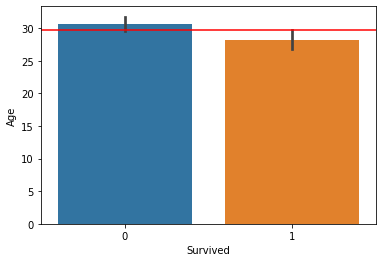

In [18]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(titanic['Survived'], titanic['Age'])
plt.axhline(titanic['Age'].mean(), color='r')
plt.show()

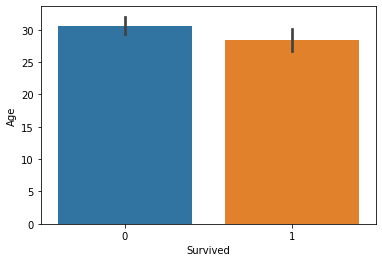

In [ ]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot

* 박스플롯으로 시각화 해 봅시다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


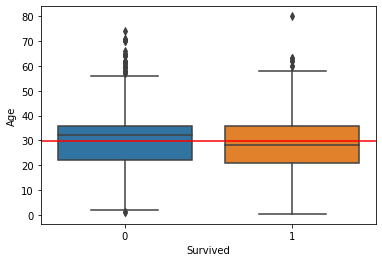

In [20]:
sns.boxplot(titanic['Survived'], titanic['Age'])
plt.axhline(titanic['Age'].mean(), color='r')
plt.show()

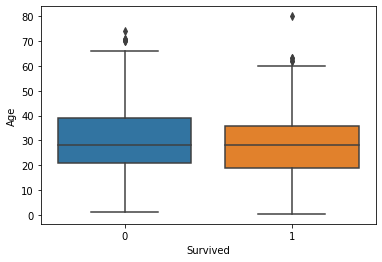

* 위 두 범주간에 평균에 차이가 있나요?

② titanic 성별에 따라 운임에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


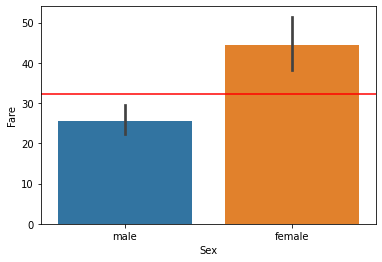

In [17]:
sns.barplot(titanic['Sex'], titanic['Fare'])
plt.axhline(titanic['Fare'].mean(), color='r')
plt.show()

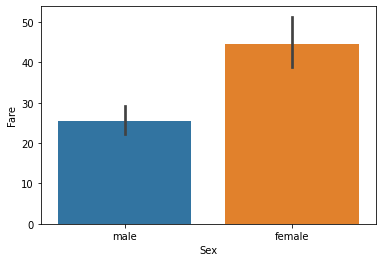

In [ ]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot


* 박스플롯으로 시각화 해 봅시다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


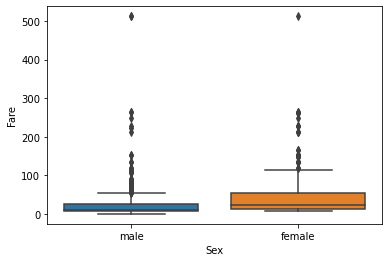

In [13]:
sns.boxplot(titanic['Sex'], titanic['Fare'])
plt.show()

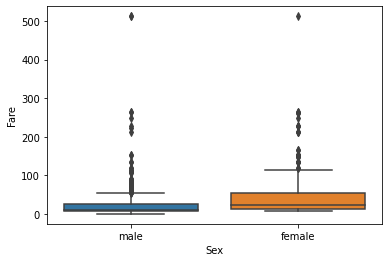

* 위 범주간 평균에 차이가 있나요?

- 박스플롯의 경우 이상치값으로 인해 평균의 범위가 매우 적게 나와 비교해 보기 힘들다

③ titanic 승선지역(Embarked)에 따라 나이에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


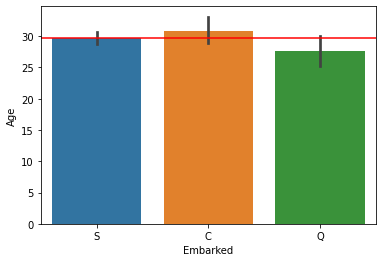

In [21]:
sns.barplot(titanic['Embarked'], titanic['Age'])
plt.axhline(titanic['Age'].mean(), color='r')
plt.show()

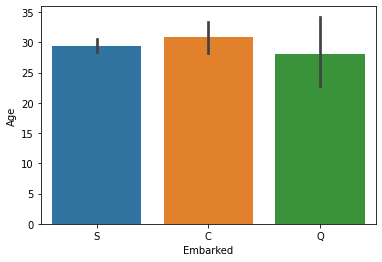

In [ ]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot


* 박스플롯으로 시각화 해 봅시다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


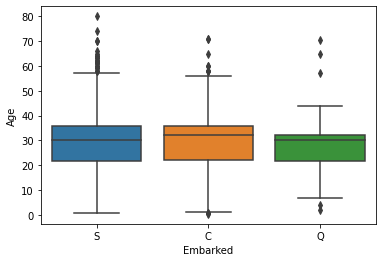

In [15]:
sns.boxplot(titanic['Embarked'], titanic['Age'])
plt.show()

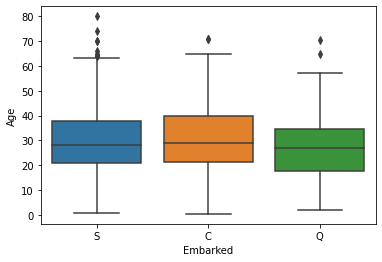

* 위 범주간 평균에 차이가 있나요?

- 차이가 미세하다고 본다, 신뢰구간도 겹친다

④ diamonds color에 따른 가격에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

In [26]:
diamonds.head()

carat        cut color clarity  depth  table  price     x     y     z
50989   0.31      Ideal     G     VS2   61.6   55.0    544  4.37  4.39  2.70
42221   0.33      Ideal     E      IF   62.1   55.0   1289  4.43  4.46  2.76
42307   0.41      Ideal     F    VVS1   62.1   57.0   1295  4.75  4.79  2.96
27207   2.02  Very Good     F     SI1   62.7   59.0  17530  7.97  8.03  5.02
22207   1.50       Good     H     VS1   63.4   59.0  10256  7.20  7.29  4.59

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


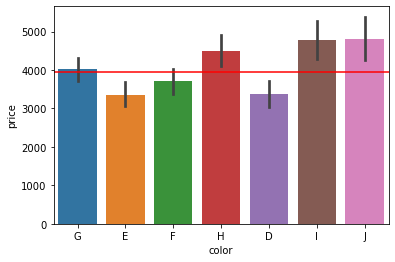

In [27]:
sns.barplot(diamonds['color'], diamonds['price'])
plt.axhline(diamonds['price'].mean(), color='r')
plt.show()

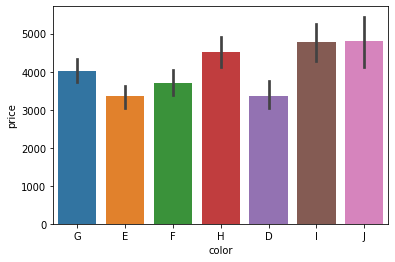

In [ ]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot


* 박스플롯으로 시각화 해 봅시다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


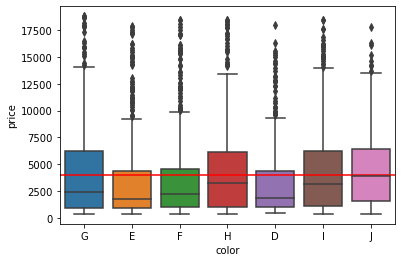

In [28]:
sns.boxplot(diamonds['color'], diamonds['price'])
plt.axhline(diamonds['price'].mean(), color='r')
plt.show()

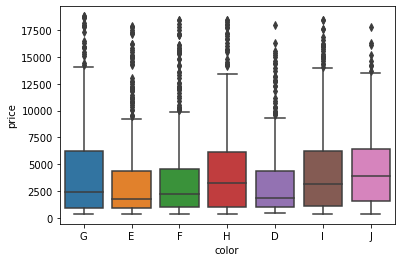

* 위 범주간 평균에 차이가 있나요?

* 차이가 많지는 않지만 그렇다고 너무 난다고는 할 수 없다

## 3.수치화 : t-test(두 범주), anova(세 범주 이상)

① titanic 생존여부에 따라 나이에 차이가 있을까요?

* t-test를 수행해 봅시다.

In [35]:
# 먼저 범주별로 데이터를 나눕시다.

temp = titanic.loc[titanic['Age'].notnull()]

d = temp.loc[temp['Survived']==0, 'Age']
s = temp.loc[temp['Survived']==1, 'Age']

In [36]:
# t-test를 수행
spst.ttest_ind(d,s)

Ttest_indResult(statistic=2.6686741711011606, pvalue=0.007753857024893963)

* t-test 결과를 해석해 봅시다.

p-value값이 0.05보다 작으므로 생존여부에 나이가 영향이 있다고 볼 수 있다.

그래프에서는 차이가 없어 보였는데, 가설검정 p-value를 확인하니 0.05보다 작게 나옴

==> 영향을 미치기는 하나, 그 영향력이 미미함

② titanic 성별에 따라 운임에 차이가 있을까요?

* t-test를 수행해 봅시다.

In [38]:
# 먼저 범주별로 데이터를 나눕시다.

male = titanic.loc[titanic['Sex']=='male', 'Fare']
female = titanic.loc[titanic['Sex']=='female', 'Fare']

In [39]:
# t-test를 수행

spst.ttest_ind(male, female)

Ttest_indResult(statistic=-5.529140269385719, pvalue=4.2308678700429995e-08)

* t-test 결과를 해석해 봅시다.

p-value가 0.05보다 작으므로 성별에 따른 운임에 차이가 있다고 볼 수 있다.

③ titanic 승선지역(Embarked)에 따라 나이에 차이가 있을까요?

* 분산분석(anova)을 수행해 봅시다.

In [48]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [49]:
# 먼저 범주별로 데이터를 나눕시다.
temp = titanic.loc[titanic['Embarked'].notnull()]
s = temp.loc[temp['Embarked']=='S', 'Age']
c = temp.loc[temp['Embarked']=='C', 'Age']
q = temp.loc[temp['Embarked']=='Q', 'Age']

In [50]:
# anova를 수행
spst.f_oneway(s,c,q)

F_onewayResult(statistic=1.5519517205674485, pvalue=0.2124081352616724)

* anova 결과를 해석해 봅시다.

그래프로는 약간 관련이 있어 보였으나, 분산분석으로는 차이가 없다.

p-value가 0.05보다 크므로 유의미한 수치로 볼 수 없다.

④ diamonds color에 따른 가격에 차이가 있을까요?

* 분산분석(anova)을 수행해 봅시다.

In [51]:
# 먼저 범주별로 데이터를 나눕시다.
d = diamonds.loc[diamonds['color']=='D', 'price']
e = diamonds.loc[diamonds['color']=='E', 'price']
f = diamonds.loc[diamonds['color']=='F', 'price']
g = diamonds.loc[diamonds['color']=='G', 'price']
h = diamonds.loc[diamonds['color']=='H', 'price']
i = diamonds.loc[diamonds['color']=='I', 'price']
j = diamonds.loc[diamonds['color']=='J', 'price']

In [52]:
# anova를 수행
spst.f_oneway(d,e,f,g,h,i,j)

F_onewayResult(statistic=8.748551345095596, pvalue=1.80447619297854e-09)

In [55]:
# anova를 수행

spst.f_oneway(d,e,f,g,h,i,j)

F_onewayResult(statistic=8.748551345095596, pvalue=1.80447619297854e-09)

* anova 결과를 해석해 봅시다.

p-value의 값이 0.05보다 높은 1.8 임을 보고

다이아몬드의 색깔에 따른 가격의 영향은 없다고 판단할 수 있다.

